In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import uniform
from scipy.stats import poisson

# Variable of Transformation

Drawing a random sample, $x$ from the uniform distribution, we van apply a variable of transformation, $u=f(x)$ to each data point, and analytically find the new probability distribution, $g(u)$.

#### Derive $g(u)$ Analytically for $u = x^2$ 
For a transformation of the p.d.f $f(x)=u$ to $g(u)$ by function $u(x)$, the relationship between the three functions in differential form is <br>
\begin{gather*}
    g(u)=f(x)+|\frac{dx}{du}| 
\end{gather*}
To solve for $g(u)$ given this relation and the function $u=e-x$, first express x in terms of u <br>
\begin{gather*}
    u=x^2 \\
    x=\sqrt{u}
\end{gather*}
Solving for $\frac{dx}{du}$ <br>
\begin{gather*}
    \frac{dx}{du}=\frac{d}{du}(\sqrt{u}) \\
    =\frac{d}{du}(u^\frac{1}{2}) \\
    =\frac{1}{2}u^\frac{-1}{2}
\end{gather*}
Thus, <br>
\begin{gather*}
    g(u)=u*\frac{1}{2}u^\frac{-1}{2} \\
    =\frac{\sqrt{u}}{2}
\end{gather*}


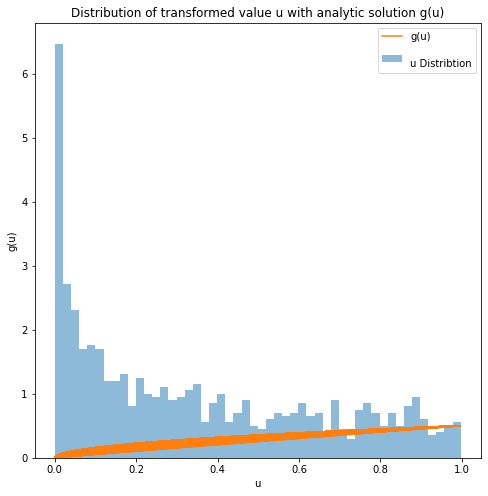

In [179]:
# u=x^2, g(u)=sqrt(u)/2
x = uniform.rvs(size=1000)

u = x ** 2
g = np.sqrt(u) / 2

def g(u):
    return np.sqrt(u) / 2

fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.title("Distribution of transformed value u with analytic solution g(u)")
plt.xlabel("u")
plt.ylabel("g(u)")

ax.hist(u, bins=50, density=True, alpha=0.5)
ax.plot(u, g(u))

ax.legend(["g(u)", '\nu Distribtion'])


#### Derive $g(u)$ Analytically for $u = e^x$ 
For a transformation of the p.d.f $f(x)=u$ to $g(u)$ by function $u(x)$, the relationship between the three functions in differential form is <br>
\begin{gather*}
    g(u)=f(x)+|\frac{dx}{du}| 
\end{gather*}
To solve for $g(u)$ given this relation and the function $u=e^x$, first express x in terms of u <br>
\begin{gather*}
    u=e^x \\
    x=\ln(u)
\end{gather*}
Solving for $\frac{dx}{du}$ <br>
\begin{gather*}
    \frac{dx}{du}=\frac{d}{du}\ln(u) \\
    =\frac{1}{u}
\end{gather*}
Thus, <br>
\begin{gather*}
    g(u)=u*\frac{1}{u} \\
    =\frac{u}{u} \\
    =1
\end{gather*}


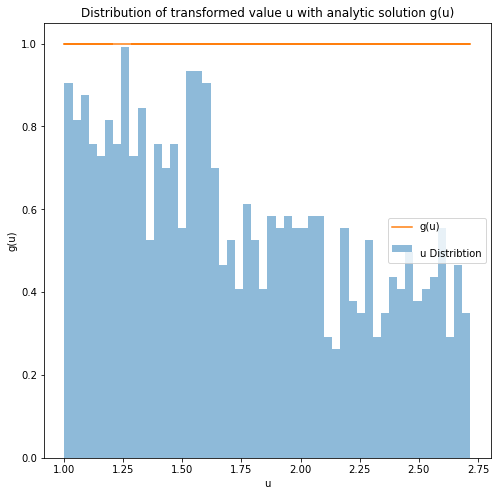

In [175]:
x = uniform.rvs(size=1000)
u = np.exp(x)

g = u / u

fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.title("Distribution of transformed value u with analytic solution g(u)")
plt.xlabel("u")
plt.ylabel("g(u)")
          
ax.hist(u, bins=50, density = True, alpha=0.5)
ax.plot(u, g)
ax.legend(["g(u)", '\nu Distribtion'])

# Throwing Two Dices

We can simulate a fair dice by drawing a random uniform distribution of x between 0 and 1. There are multiple ways to do so, e.g. multiply a random number x by 6, take the integer part of the number and add it by one 
([0,1]→[0,5]→[1,6]) 
or use numpy.random.uniform(). This number represents the face of the dice. We can repeat this procedure N times to simulate throwing the dice N times.

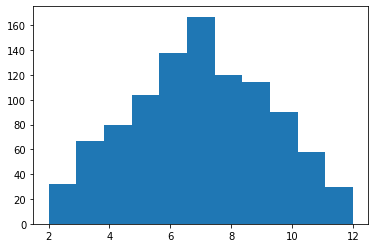

The variance of the sum distribution is 6.209804
The mean of the sum distribution is 6.986
The probability of Sevens is 0.167
The statistical uncertainty in the probability is 0.01179453263168999
The analytical probability of rolling a sum of 7 is sevens= 0.16666666666666666


In [183]:
def dice_rolls(dice, rolls):      
    return np.sum(np.random.randint(1,7,(dice,rolls)),axis=0)

sum_rolls = dice_rolls(2, 1000)

def dice_histogram(sum_rolls, bins):
    plt.hist(sum_rolls, bins)
    plt.show()

dice_histogram(sum_rolls, 11)

variance = np.var(sum_rolls, axis=None)
mean = np.mean(sum_rolls, axis=None)

print("The variance of the sum distribution is", variance)
print("The mean of the sum distribution is", mean)

sevens_sum = np.count_nonzero(sum_rolls == 7)
p_sevens_ratio = sevens_sum / 1000
# the probability uncertainty is the standard error of the binomial proportion
uncertainty = np.sqrt((p_sevens_ratio * (1 - p_sevens_ratio)) / 1000)

print("The probability of Sevens is", p_sevens_ratio)
print("The statistical uncertainty in the probability is", uncertainty)

# Analytical
p_sevens_an = 6 * ((1 / 6) * (1 / 6))
print('The analytical probability of rolling a sum of 7 is sevens=', p_sevens_an)

#  Central Limit Theorem
The central limit theorem states that the distribution of the sample mean 
¯
x
, 
¯
x
=
1
N
Σ
N
i
=
1
x
i
, of N variables 
x
i
 with finite variance 
σ
2
 in the limit 
N
→
inf
 will approach a normal distribution with variance 
σ
2
/
N
 independent of the form of the distribution f(x). In this computational experiment, we will test this theorem.

Generate a 5 event sample using built-in Poisson distributions in scipy with 
λ
=
2.0
. From these 5 events, calculate average 
μ
5
 and standard deviation 
σ
5
. Repeat tnis process N times. For each time, you will draw different set of 5 events, and calculate indepdent 
μ
5
 and 
σ
5
, respectively.

In [137]:
# N=10
# miu is 2

def Poisson(N):
    samples_avg = np.zeros(N, dtype=object)
    samples_variance = np.zeros(N, dtype=object)

    for i in range(N):
        sample = poisson.rvs(2, size=5)
        samples_avg[i] = np.mean(sample)
        samples_variance[i] = np.var(sample)
    # print(samples_avg, samples_variance)
    return (samples_avg, samples_variance)

def Poisson_dist(samples_avg, samples_variance):
    plt.hist(samples_avg, bins=10, alpha=0.5)
    plt.hist(samples_variance, bins=10, alpha=0.5)
    return 

[2.0 1.6 2.2 1.2 2.8 1.6 1.6 1.2 2.6 3.0] [0.8 1.4400000000000002 1.3599999999999999 1.36 2.56 2.64
 3.0399999999999996 0.96 3.04 0.4]


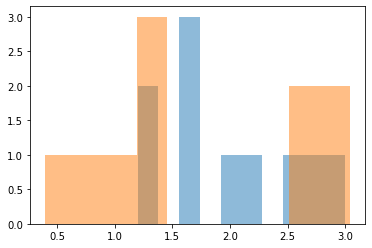

In [131]:
# N=10

A10, V10 = Poisson(10)
plt.show(Poisson_dist(A10, V10))

(array([31., 35., 12., 16.,  3.,  2.,  0.,  0.,  0.,  1.]),
 array([0.15999999999999998, 0.8239999999999998, 1.4879999999999998,
        2.1519999999999997, 2.816, 3.4799999999999995, 4.143999999999999,
        4.808, 5.4719999999999995, 6.135999999999999, 6.8], dtype=object),
 <BarContainer object of 10 artists>)

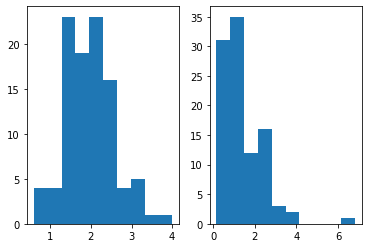

In [141]:
# N=100

A100, V100 = Poisson(100)
fig, ax = plt.subplots(1,2)
ax[0].hist(A100, bins=10)
ax[1].hist(V100, bins=10)

(array([ 28.,  51.,  46., 146.,  43.,  52.,  83.,  43., 119.,  22.,  21.,
         61.,  26.,  73.,  11.,  16.,  33.,  16.,  12.,   4.,  23.,   4.,
          7.,   8.,   4.,   7.,   6.,   7.,   1.,   0.,   9.,   5.,   1.,
          2.,   1.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   2.,   0.,   1.]),
 array([0.0, 0.16479999999999997, 0.32959999999999995, 0.49439999999999995,
        0.6591999999999999, 0.8239999999999998, 0.9887999999999999,
        1.1535999999999997, 1.3183999999999998, 1.4831999999999999,
        1.6479999999999997, 1.8127999999999997, 1.9775999999999998, 2.1424,
        2.3071999999999995, 2.4719999999999995, 2.6367999999999996,
        2.8015999999999996, 2.9663999999999997, 3.1311999999999993,
        3.2959999999999994, 3.4607999999999994, 3.6255999999999995,
        3.7903999999999995, 3.9551999999999996, 4.119999999999999, 4.2848,
        4.449599999999999, 4.614399999999999, 4.7791999999999994,
        4.943999999999999

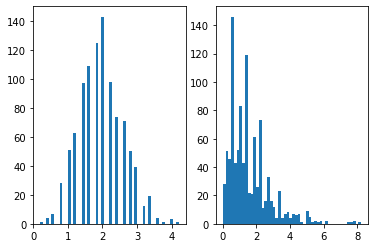

In [142]:
# N=1000

A1000, V1000 = Poisson(1000)
fig, ax = plt.subplots(1,2)
ax[0].hist(A1000, bins=50)
ax[1].hist(V1000, bins=50)

# Bonus
Generate 1000 samples. Each sample is a 10 event dataset using one built-in distribution in scipy but not Binomial, Normal nor Poisson. Show that the mean and variance of these 1000 samples also behave like a Normal Distribution.

In [146]:
from scipy.stats import bernoulli

def Bernoulli(N):
    bsamples_avg = np.zeros(N, dtype=object)
    bsamples_variance = np.zeros(N, dtype=object)

    for i in range(N):
        sample = bernoulli.rvs(0.2, size=10)
        bsamples_avg[i] = np.mean(sample)
        bsamples_variance[i] = np.var(sample)
    # print(samples_avg, samples_variance)
    return (bsamples_avg, bsamples_variance)


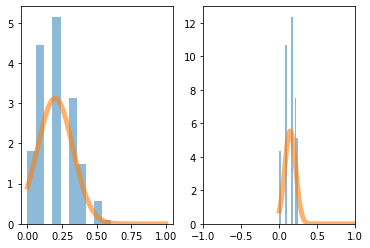

In [159]:
from scipy.stats import norm

bsamples_avg, bsamples_variance = Bernoulli(1000)

# avg and std of both distributions to compare to normal 

avg_dist_mean = np.mean(bsamples_avg)
avg_dist_std = np.std(bsamples_avg)
var_dist_mean = np.mean(bsamples_variance)
var_dist_std = np.std(bsamples_variance)


# norm_avg_samp = norm.rvs(loc = 3.0, scale = 0.01, size = 100000)
# norm_var_samp = norm.rvs(loc = var_dist_mean, scale = var_dist_std, size=1000)
x = np.linspace(0,1,100)

fig, ax = plt.subplots(1, 2)

plt.xlim(-1,1)

ax[0].hist(bsamples_avg, bins=10, density=True, alpha=0.5)
ax[0].plot(x, norm.pdf(x, loc=avg_dist_mean, scale=avg_dist_std), linewidth=5, alpha=0.6)
ax[1].hist(bsamples_variance, bins=10, density=True, alpha=0.5)
ax[1].plot(x, norm.pdf(x, loc=var_dist_mean, scale=var_dist_std), linewidth=5, alpha=0.6)

